# Student Exam Score Prediction


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Load data
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## 2. Exploratory Data Analysis (EDA)

In [83]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.dtypes   # Check data types

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [84]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [85]:
#  missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


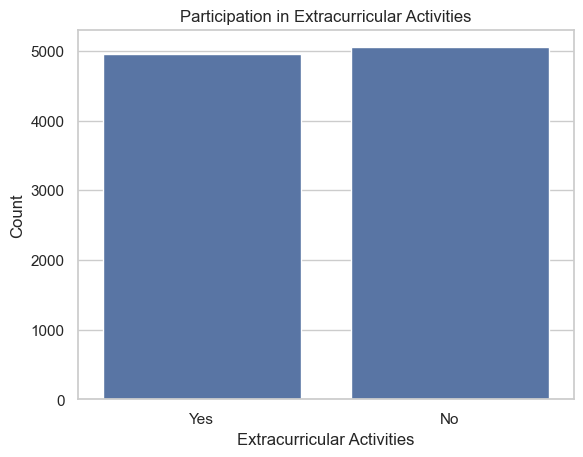

In [86]:
# Categorical distribution(Value Counts for Categorical Features)
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Participation in Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.show()


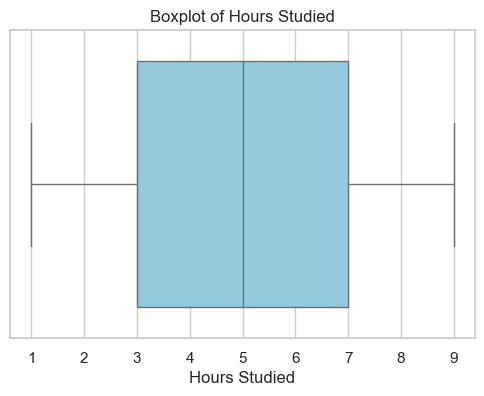

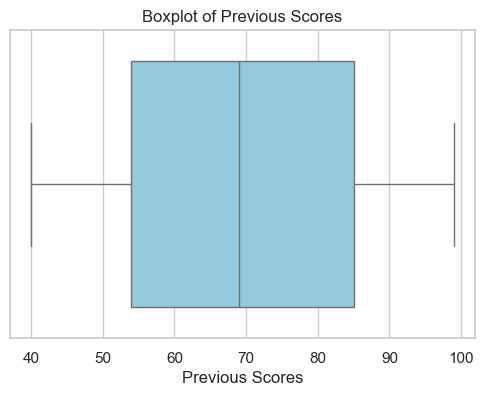

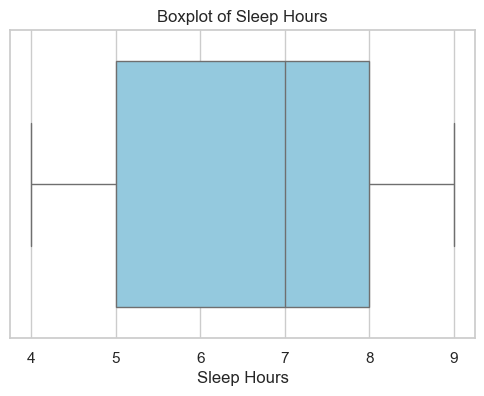

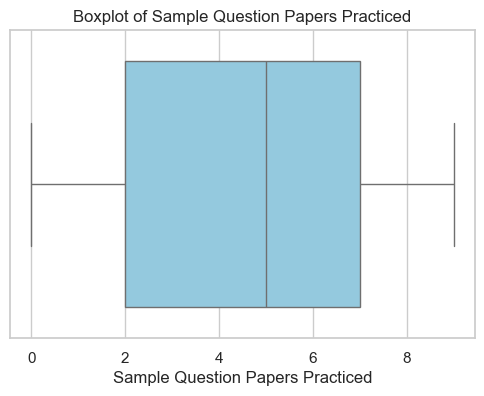

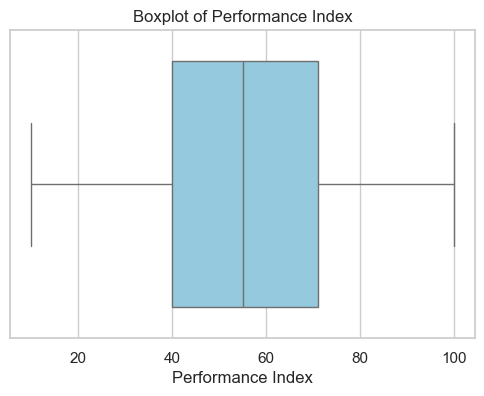

In [87]:
# Boxplots for all numerical columns
num_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()


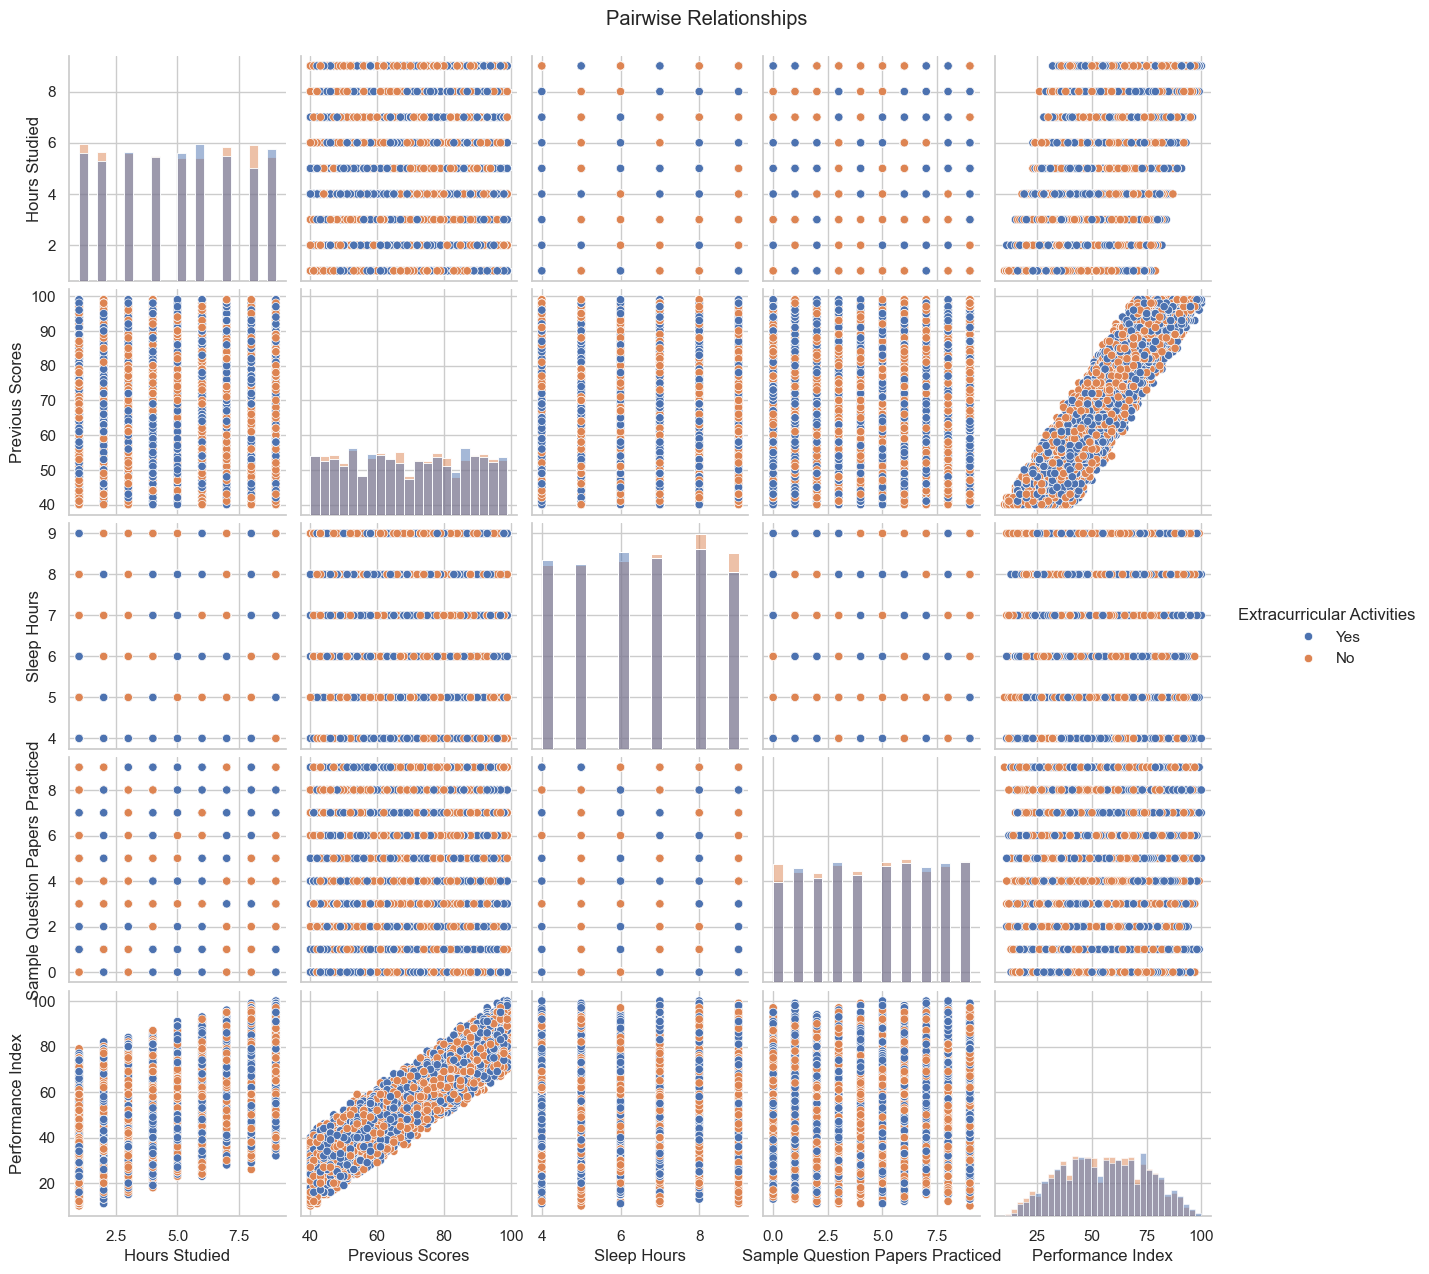

In [88]:
# Pairplot with color hue on Extracurricular Activities
sns.pairplot(df, hue='Extracurricular Activities', diag_kind='hist')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


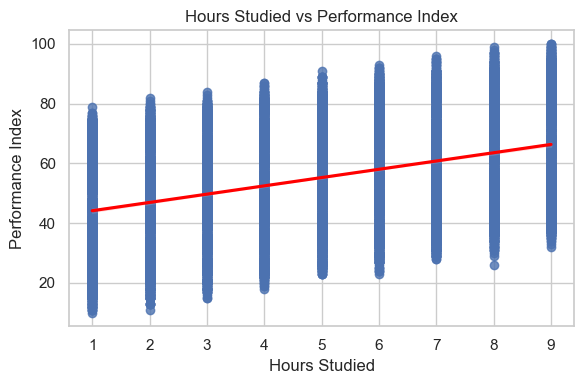

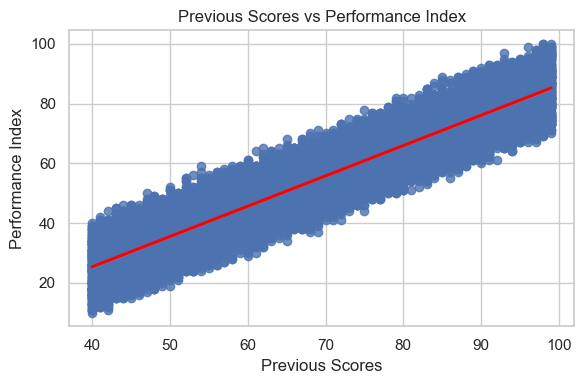

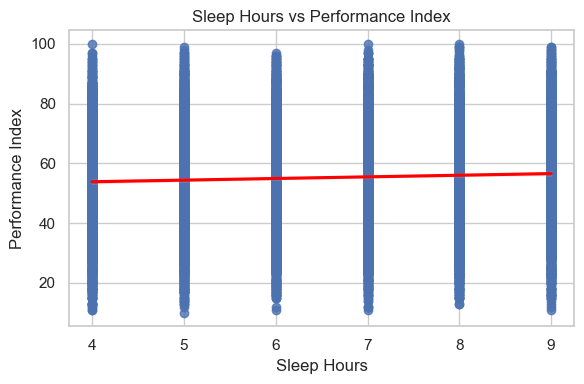

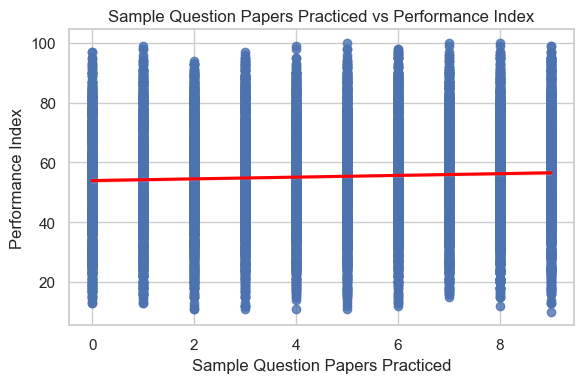

In [89]:
# List of numerical features to compare with the target variable
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[feature], y=df['Performance Index'], line_kws={'color': 'red'})
    plt.title(f'{feature} vs Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.tight_layout()
    plt.show()


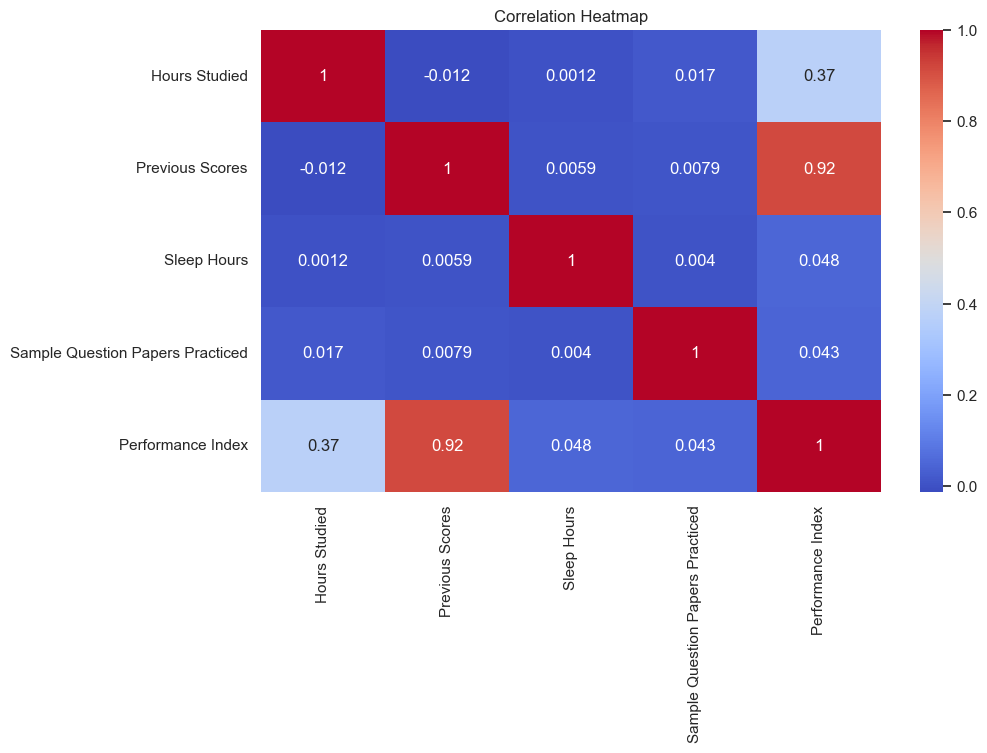

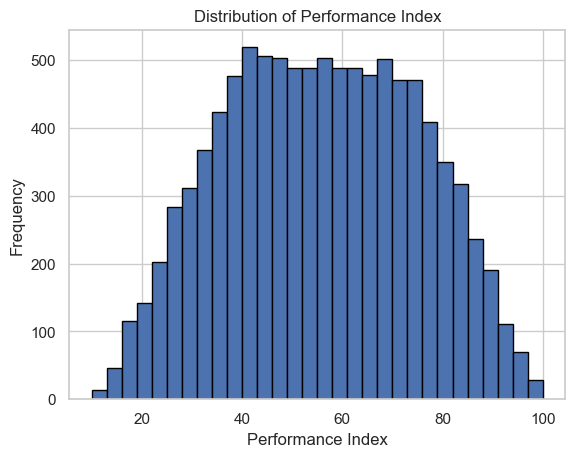

In [90]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target
df['Performance Index'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()


In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features & target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Identify categorical & numerical columns
cat_features = ['Extracurricular Activities']
num_features = [col for col in X.columns if col not in cat_features]

from sklearn.preprocessing import StandardScaler

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_features),
    ('num', StandardScaler(), num_features)
])


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # 80% train, 20% test split
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (8000, 5), Test shape: (2000, 5)


In [93]:
from sklearn.metrics import r2_score,root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor



# Define models
models = {
     'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
    }


# Evaluate models
results = {}
best_r2 = -np.inf
best_model_name = None
best_model = None

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = pipeline

results_df = pd.DataFrame(results).T
results_df


,R2,RMSE,MAE
Linear Regression,0.988983,2.020552,1.611121
Ridge Regression,0.988982,2.020696,1.611222
Lasso Regression,0.988969,2.021829,1.611718
Decision Tree,0.976335,2.961430,2.334583
Random Forest,0.986130,2.267156,1.810911
Gradient Boosting,0.988411,2.072342,1.643197
AdaBoost,0.980189,2.709533,2.136221
Support Vector Regressor,0.985924,2.283903,1.792765
XGBoost,0.985686,2.303158,1.836028


In [94]:
import pickle

print(f"Best model: {best_model_name} with R2={best_r2:.4f}")
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best model: Linear Regression with R2=0.9890
